In [1]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')

from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch

import gc
torch.cuda.empty_cache()
gc.collect()

0

In [2]:
parent_dir = os.path.join(os.getcwd(),"..")
csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
X = X.reshape((610,340, 103))
# X = X.reshape((1096, 715, 102))

df = dsl.read_dataset(gt=True)
y = np.array(df)

factor = 7
rows_factor = factor
cols_factor = factor

X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [3]:
# from MetaLearner import HDDOnBands

# weights, dist_batches = HDDOnBands.createMinSimilarityBasedBatches(X,4)

# print(weights)
# print("########################")
# print(dist_batches)

In [4]:
import gc
torch.cuda.empty_cache()
gc.collect()

train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common')

XXXXXXX IN METHOD XXXXXXXXX
WHOLE METHOD TIME:  111.78242707252502
XXXXXXX IN CLASSIFICATION XXXXXXXXX
Train Accuracy:  0.9015433741351783
Test Accuracy:  0.8397921138854366


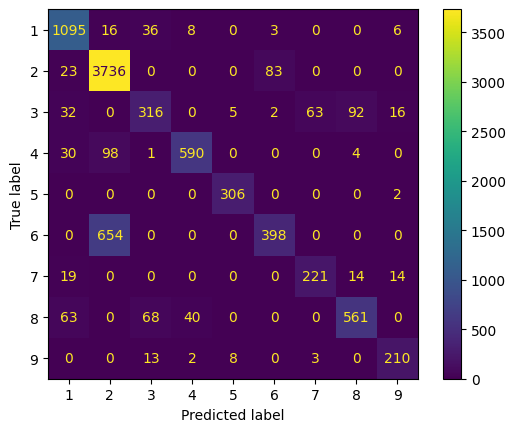

In [5]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(test_gt,test_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = range(1,10))

cm_display.plot()
plt.show()

In [6]:
import gc
torch.cuda.empty_cache()
gc.collect()

whole_pipeline_divided(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

print()

NameError: name 'weights' is not defined

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

print()

TOTAL TIME FOR METHOD:  6.9529619216918945
Train Accuracy:  0.7598056331471136
Test Accuracy:  0.6541299690549869

